   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.4 MB/s eta 0:00:00
--- Step 1: Libraries Installed and Imported ---
Extracting Sampledata_5A.zip...
Download and extraction complete.

--- Step 2: Loading DICOM file from ./Sampledata_5A/Sample5_1.dcm ---
DICOM file loaded successfully.

--- Step 3: Viewing Selected DICOM Metadata ---
Manufacturer Model Name: Revolution XQi ADS_28.2
Patient Name (via Tag Number): (0010,0010) Patient's Name                      PN: ''
Patient Name (Value Only): 

--- Step 4: Displaying the Medical Image ---


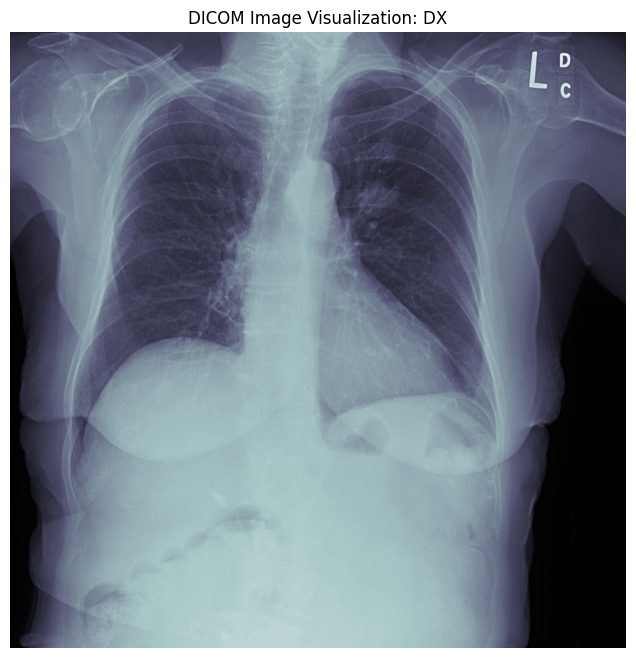


Workflow execution complete.


In [1]:
# ----------------------------------------------------------------------
# EXPT 3: DICOM Retrieval and Visualization Workflow
# ----------------------------------------------------------------------

# 1. Install necessary libraries
# 'pydicom' for reading DICOM files and 'gdown' for downloading the sample data.
# The '!' prefix runs these as shell commands in Colab.
!pip install pydicom
!pip install gdown

# 2. Import required Python libraries
import pydicom as dicom
import matplotlib.pyplot as plt
import gdown
import os
import zipfile
import sys # Import sys for printing DICOM metadata

print("--- Step 1: Libraries Installed and Imported ---")


# 3. Downloading and Extracting the sample images
# This block checks if the required folder exists, downloads the data archive,
# extracts the contents, and cleans up the zip file.
data_folder = "Sampledata_5A"
zip_file = "Sampledata_5A.zip"
download_url = "https://drive.google.com/uc?export=download&id=1Mafu1sTobziya-n-MFCJeR8QftigKhDG"

if not os.path.isdir(data_folder):
    print(f"Downloading sample data to {zip_file}...")
    try:
        # gdown.download handles the Google Drive link conversion
        gdown.download(download_url, zip_file, quiet=True, fuzzy=True)

        if os.path.exists(zip_file):
            print(f"Extracting {zip_file}...")
            with zipfile.ZipFile(zip_file, 'r') as zip_ref:
                zip_ref.extractall(".")
            os.remove(zip_file)
            print("Download and extraction complete.")
        else:
            print(f"Error: {zip_file} not found after download.")
            sys.exit(1) # Exit if download failed

    except Exception as e:
        print(f"An error occurred during download/extraction: {e}")
        sys.exit(1)
else:
    print(f"Data folder '{data_folder}' already exists. Skipping download.")


# 4. Specify the path to the DICOM image file
# The downloaded data is extracted to /content/Sampledata_5A/
image_path = f"./{data_folder}/Sample5_1.dcm"


# 5. Load the DICOM file
print(f"\n--- Step 2: Loading DICOM file from {image_path} ---")
try:
    ds = dicom.dcmread(image_path)
    print("DICOM file loaded successfully.")
except FileNotFoundError:
    print(f"Error: DICOM file not found at {image_path}. Check extraction path.")
    sys.exit(1)


# 6. View the image metadata (DICOM tags)
print("\n--- Step 3: Viewing Selected DICOM Metadata ---")

# Print manufacturer model name using the tag name
manufacturer = ds.ManufacturerModelName
print(f"Manufacturer Model Name: {manufacturer}")

# Print patient name using the DICOM tag number (0x0010, 0x0010)
# The output format for this tag includes the tag information and value representation (PN)
patient_name_tag = ds[0x10, 0x10]
print(f"Patient Name (via Tag Number): {patient_name_tag}")

# For a cleaner look, you can access the value directly using the tag name:
print(f"Patient Name (Value Only): {ds.PatientName}")


# 7. Visualize the DICOM image
print("\n--- Step 4: Displaying the Medical Image ---")
# The pixel_array attribute holds the actual image data
plt.figure(figsize=(8, 8))
plt.imshow(ds.pixel_array, cmap=plt.cm.bone) # 'bone' colormap is typical for X-rays
plt.title(f"DICOM Image Visualization: {ds.Modality}")
plt.axis('off') # Hide axis ticks and labels
plt.show()

print("\nWorkflow execution complete.")